<a href="https://colab.research.google.com/github/mikiiiiiiiiiiiiiiiiiiii/progetto_esame_AI/blob/main/prova__con_dataset_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLASSIFICAZIONE FASHION MNIST**<br>In questo notebook si classificherà il dataset Fashion Mnist attraverso vari algoritmi al fine di scegliere il migliore. 

Importiamo le librerie che servono:  

1.   **numpy**: *per il calcolo numerico*;
2.   **pandas**: *per l'analisi e manipolazione dei dati*;
3.   **tensorflow e keras**: *per le reti neurali*;
4.   **sklearn**: *per gli algortimi di machine learning*;
5.  **matplotlib e seaborn**: *per la visualizzaione dei dati*.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

Carichiamo i dati già presenti nella libreria di keras.<br> I dati rappresentano delle immagini di abbigliamento, ogni immagine è composta da 28x28 pixels di scale di grigio ( da 0 a 255).<br>
Abbiamo 60000 immagini per il dataset di train e 10000 immagini per il dataset di test.

In [2]:
(keras_x_train, keras_y_train), (keras_x_val, keras_y_val) = fashion_mnist.load_data()
# Each training and test example is assigned to one of the following labels:

class_map = {0:'T-shirt/top',
             1:'Trouser',
             2:'Pullover',
             3:'Dress',
             4:'Coat',
             5:'Sandal',
             6:'Shirt',
             7:'Sneaker',
             8:'Bag',
             9:'Ankle boot'}


4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_map.values()

dict_values(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

In [4]:
np.shape(keras_x_train.T)
np.shape(np.transpose(keras_y_train))

(60000,)

Cambiamo da tre dimensioni a due la forma del dataset per esplorare meglio i valori delle features.<br>Ora ogni riga rappresenta un'immagine. 


In [5]:
w = keras_x_train[:,:,0]
for index, valore in enumerate(range(1 , np.shape(keras_x_train)[2])):
 w = np.hstack((w , keras_x_train[:,:,index]))
x = keras_x_val[:,:,0]
for i, v in enumerate(range(1 , np.shape(keras_x_val)[2])):
 x = np.hstack((x , keras_x_val[:,:,i]))
print('shape di x train', np.shape(w), '\nshape di x val', np.shape(x))

shape di x train (60000, 784) 
shape di x val (10000, 784)


Trasformiamo i nostri dati da vettori numpy a dataframe pandas.

In [6]:
col = []
for i in range(np.shape(w)[1]):
  col.append('pixel_'+ str(i))
x_train = pd.DataFrame(w , columns = col)
y_train = pd.DataFrame(keras_y_train , columns = ['labels'])
x_val = pd.DataFrame(x , columns = col)
y_val = pd.DataFrame(keras_y_val , columns = ['labels'])

# one hot encode target values to_categorical

In [7]:
np.shape(y_train.to_numpy().T)

(1, 60000)

In [8]:
# scaler1=StandardScaler()
# scaler2=StandardScaler()
# scaler1.fit(x_train)

# scaler2.fit_transform(y_train)
# scaler1.transform(x_val)
# scaler2.transform(y_val)
# myparamas=scaler1.get_params()
# myparamas

**Exploratory data analysis**<br>Esploriamo i nostri dati per conoscere meglio i possibili valori e range delle features, i valori  mancanti ed eventuali outliers.

In [9]:
x_train.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_744,pixel_745,pixel_746,pixel_747,pixel_748,pixel_749,pixel_750,pixel_751,pixel_752,pixel_753,pixel_754,pixel_755,pixel_756,pixel_757,pixel_758,pixel_759,pixel_760,pixel_761,pixel_762,pixel_763,pixel_764,pixel_765,pixel_766,pixel_767,pixel_768,pixel_769,pixel_770,pixel_771,pixel_772,pixel_773,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000800,0.007117,0.026133,0.060533,0.119917,0.276417,0.471750,0.765283,1.003017,1.22025,1.534833,1.905033,2.308067,2.694483,3.665750,6.279017,9.144800,9.413567,7.692750,6.861867,6.652017,5.913417,4.746017,3.322950,1.923633,0.942217,0.277933,0.023333,0.000800,0.007117,0.026133,0.060533,0.119917,0.276417,0.471750,0.765283,1.003017,1.22025,1.534833,1.905033,...,61.630117,58.501450,55.246800,51.581983,44.656117,38.268533,31.768650,25.24040,19.541517,13.793933,9.115983,2.706333,0.097650,0.467867,1.134667,2.154250,3.939917,6.899033,10.183950,13.52220,17.481917,22.366733,28.815733,35.690717,41.640400,46.301117,50.020467,53.328417,54.123633,50.927767,47.313767,41.944850,33.851400,28.050083,21.955633,16.064600,11.259717,7.057667,3.783350,0.819000
std,0.092554,0.566072,1.683319,2.393755,3.098359,5.237802,6.991367,8.979783,10.394085,11.45923,13.157762,14.645725,15.997666,17.628285,20.104775,25.153062,29.456652,29.184226,26.167396,25.120841,25.260462,23.923438,21.712367,17.954226,13.753861,9.421634,4.947622,0.927435,0.092554,0.566072,1.683319,2.393755,3.098359,5.237802,6.991367,8.979783,10.394085,11.45923,13.157762,14.645725,...,86.981035,84.718461,82.740041,80.570559,76.900067,73.499837,68.094814,61.93865,55.057621,46.377868,37.582833,17.258682,2.934722,8.000829,12.928121,18.089288,24.142631,31.966764,38.940933,44.51107,50.343576,56.244110,63.444468,70.462782,76.508868,81.256929,84.119513,86.510800,86.412927,83.649679,80.886952,76.751771,70.824694,66.255440,59.223261,51.331146,43.054014,33.781255,24.379595,9.133252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [10]:
x_val.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_744,pixel_745,pixel_746,pixel_747,pixel_748,pixel_749,pixel_750,pixel_751,pixel_752,pixel_753,pixel_754,pixel_755,pixel_756,pixel_757,pixel_758,pixel_759,pixel_760,pixel_761,pixel_762,pixel_763,pixel_764,pixel_765,pixel_766,pixel_767,pixel_768,pixel_769,pixel_770,pixel_771,pixel_772,pixel_773,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,70,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,150,161,162,189,220,158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,48,119,178,165,189,196,184,206,151,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,58,70,84,135,111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Il dataset è bilanciato, abbiamo un uguale numero di capi d'abbigliamento.
Sia il train che il validation.

In [11]:
y_train.describe()

,labels
count,60000.000000
mean,4.500000
std,2.872305
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


In [12]:
y_val.describe()

,labels
count,10000.000000
mean,4.500000
std,2.872425
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


Nessuno dei dataset presenta valori mancanti.

In [13]:
one = x_train.isnull().sum().sum()
two = y_train.isnull().sum().sum() 
three = x_val.isnull().sum().sum()
four = y_val.isnull().sum().sum()
print(one + two + three + four , 'missing values')

0 missing values


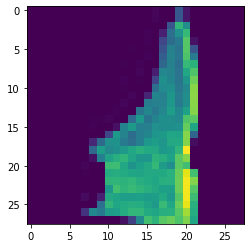

In [14]:
# image at row 0 in validation [scarpa(?)]
image = x_val.iloc[0,:]
image = np.array(image).T
image = image.reshape((28,28))
plt.figure()
plt.imshow(image)

Immagine alla riga 1: Maglietta

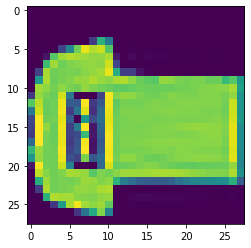

In [15]:
image = x_train.iloc[1,:]
image = np.array(image)
image = image.reshape((28,28))
plt.figure()
plt.imshow(image)

**Convolutional Neural Network**<br />L'architettura migliore di una rete neurale per il riconoscimento delle immagini ci è fornita dalla rete neurale convoluzionale, questa è un particolare tipo di rete neurale che sfrutta il riconoscimento di pattern all'interno del dataset fornitole, questa funzione è possibile grazie all'uso di kernel. I kernel sono effettivamente delle matrici (o vettori) di pesi che verrano allenati e che cercano il pattern all'interno dell'immagine (ciò che in effettti fanno è il prodotto vettoriale tra matrici dati-pesi, i kernel si spostano della misura (da noi fornita alla rete) nota come stride, mentre il padding è la misura che indica come la rete si deve comportare quando arriva ai limiti dell'immagine.<br />Un'operzione comune all'interno di una CNN al fine di diminuire il numero dei pesi da allenare è quella di pooling ossia di 'estrazione' di valori da un gruppo di pixels vicini sulla base dell'ipotesi per cui un gruppo di pixels molto vicini assumerà valori molto simili. Alla fine di una CNN solitamente vengono inseriti dei layers standard fully connected e un layer finale con nodi pari al numero di labels e funzione di attivazione softmax in modo da classificare al meglio il dataset di partenza.<br>
**Funzionamento generale di una rete neurale**<br />Una rete neurale può essere utile sia per classificare sia per predirre, è composta da strati che a loro volta sono composti da neuroni, in ogni strato l'input è moltiplicato per dei pesi e messo dentro ad una funzione chiamata di attivazione scelta dal data analyst, la rete neurale viene allenata attraverso il metodo di discesa del gradiente che sostanzialmente calcola il gradiente della funzione composta dai pesi trovati per poi spostarsi di una misura verso la direzione opposta che è quella che teoricamente si dirige verso il minimo, la funzione da minimizzare spesso è la MSE ma ne esistono di diverse, per calcolare le derivate relative al gradiente in un certo punto si ricorre alla backpropagation. 

L'architettura del nostro modello comprenderà 7 strati:


1.   **Strato di input**: immagine 28x28;
2.   **Strato convoluzionale**: 32 kernel di grandezza 3x3 e funzione di      attivazione Relu;
3.   **Strato di maxpooling**: prendiamo il valore massimo per ogni matrice di valori 2x2 senza over-lapping ( essendo lo stride uguale a 2); 
4.   **Strato convoluzionale**: 64 kernel di grandezza 3x3 e funzione di attivazione Relu;
5.   **Strato di flattening**: i pesi vengono trasformati in un vettore(?); 
6.   **Strato fully-connected**: strato di 100 neuroni completamente connessi con tutti i neuroni di input;
7.   **Strato di output**: strato di 10 neuroni completamente connessi con tutti i neuroni di input, che restituisce le probabilità che una determinata immagine appartenga ad una determinata classe.



In [16]:
# CNN 
model_CNN = Sequential([
                  layers.Input(shape=(28,28,1)) ,
                  layers.Conv2D(filters=32 , kernel_size=(3,3) , activation='relu' , padding='same'),
                  layers.MaxPool2D(pool_size=(2,2) , strides=2),
                  layers.Conv2D(filters=64 , kernel_size=(3,3) , activation='relu' , padding='same'),
                  layers.Flatten(),
                  layers.Dense(units=100 , activation='relu'),
                  layers.Dense(units=10 , activation='softmax')
                  ])

In [17]:
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 100)               1254500   
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

Svolgiamo l'allenamento del modello, primma di farlo però scaliamo le nostre features in modo che il loro range sia tra 0 e 1.<br>La rete neurale sfrutterà l'algoritmo Adam per calcolare il minimo della funzione di loss che sfrutta il momentum e un decadimento esponenziale per il suo learning rate.
Come funzione di loss è stata scelta la categorical crossentropy, spesso usata per le classificazioni nei modelli di reti neurali.<br> Altre metriche di cui il modello terrà contro durante l'allenamento saranno: MSE, AUC, accuracy.<br>Il modello sarà allenato per 100 epoche, con un earlystooping di pazienza 50 che nel caso restiuirà i pesi migliori.

In [18]:
# Scale images to the [0, 1] range
keras_x_train = keras_x_train.astype("float32") / 255
keras_x_val = keras_x_val.astype("float32") / 255

#compiling the model
model_CNN.compile( optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['MeanSquaredError','AUC','accuracy'])
#fitting the model
modello_allenato = model_CNN.fit( keras_x_train , keras.utils.to_categorical(y_train) , epochs=100 , batch_size = 128 , validation_data = (keras_x_val , keras.utils.to_categorical(y_val)),
              callbacks = [ EarlyStopping(monitor = 'loss' , patience = 50 , restore_best_weights = True)])

Epoch 1/100
469/469 [==============================] - 19s 8ms/step - loss: 0.4293 - mean_squared_error: 0.0216 - auc: 0.9884 - accuracy: 0.8480 - val_loss: 0.3376 - val_mean_squared_error: 0.0177 - val_auc: 0.9926 - val_accuracy: 0.8756
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2771 - mean_squared_error: 0.0145 - auc: 0.9946 - accuracy: 0.8996 - val_loss: 0.3255 - val_mean_squared_error: 0.0170 - val_auc: 0.9929 - val_accuracy: 0.8836
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 0.2265 - mean_squared_error: 0.0120 - auc: 0.9962 - accuracy: 0.9162 - val_loss: 0.2657 - val_mean_squared_error: 0.0137 - val_auc: 0.9945 - val_accuracy: 0.9063
Epoch 4/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1944 - mean_squared_error: 0.0104 - auc: 0.9972 - accuracy: 0.9288 - val_loss: 0.2335 - val_mean_squared_error: 0.0121 - val_auc: 0.9953 - val_accuracy: 0.9176
Epoch 5/100
469/469 [==============================

In [ ]:
keras_x_train

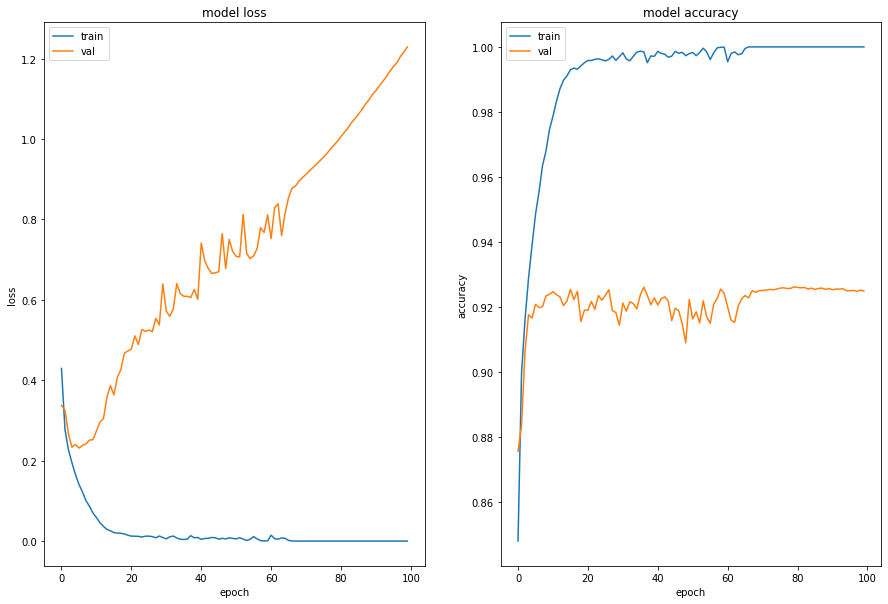

In [19]:
df_metriche = pd.DataFrame(modello_allenato.history)

fig , axes= plt.subplots(1,2)
# first plot
axes[0].plot(df_metriche.index , df_metriche['loss'] , df_metriche['val_loss'] )
axes[0].set_title('model loss')
axes[0].set(xlabel = 'epoch' , ylabel = 'loss')
axes[0].legend(['train', 'val'] , loc = 'upper left')
#second plot
axes[1].plot(df_metriche.index , df_metriche['accuracy'] , df_metriche['val_accuracy'])
axes[1].set_title('model accuracy')
axes[1].set(xlabel = 'epoch' , ylabel = 'accuracy')
axes[1].legend(['train', 'val'] , loc = 'upper left')
fig.set_figheight(10)
fig.set_figwidth(15)

In [20]:
df_metriche.loc[df_metriche['val_loss']==df_metriche['val_loss'].min()]


,loss,mean_squared_error,auc,accuracy,val_loss,val_mean_squared_error,val_auc,val_accuracy
5,0.140923,0.007587,0.998344,0.948483,0.231314,0.011644,0.994649,0.9208


I migliori pesi vengono calcolati alla settima epoca dopo la quale il modello inizia a overfittare i dati, come possiamo notare dalla loss data sull'insieme di validazione.

**RANDOM FOREST** <br />
Il random forest è un algortimo di apprendimento supervisionato usato per la classificazione e per la regressione.<br />
Il suo scopo è quello di classificare attraverso una famiglia di decision tree (ensable learning) creati attraverso l'estrazione casuale di molteplici set di dati del dataset iniziale.
Si ricorda che il decision tree è un algortimo di classificazione che divide l'originario set di dati attraverso una misura chiamata Entropy (o alternativamente Gini) fino ad arrivare a dei subset di dati che hanno alta probabilità di appartenere alla classe determinata.<br />Per tutte le features che hanno valori continui si lanciano diversi test per arrivare alla misura di threshold migliore e che massimizza l'information gain dopo lo split.
Un esempio di decion tree è mostrato successivamente nel notebook.<br />Nel random forest però non si sceglie per ogni decision tree il threshold migliore ma uno randomico, il ranodm forest di conseguenza è computazionalmente più efficente e meno time consuming. 



Misura di entropy:

\begin{align}
\sum_{i=1}^N -p_i \cdot \log_{2} p_i
\end{align}


In [21]:
random_forest = RandomForestClassifier(n_estimators = 500 , criterion = 'entropy' , verbose = 1)
random_forest.fit(x_train , y_train)
random_forest.score(x_val , y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  9.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.9s finished


0.8785

In [22]:
#Importanza delle features
# plt.hist(random_forest.feature_importances_,bins=np.shape(random_forest.feature_importances_)[0])

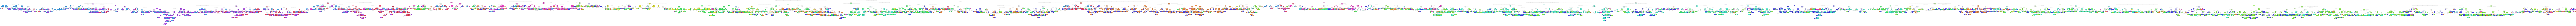

In [23]:
from sklearn.tree import export_graphviz
estimator = random_forest.estimators_[5]

# Export as dot file
export_graphviz(estimator, 
                out_file ='tree.dot', 
                feature_names = x_train.columns,
                class_names =class_map ,# ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','SneakerBag','Ankle boot'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

**SVM Classifier**<br />L'SVM è una categoria di algoritmi di apprendimento supervisionato usato per la classificazione e per la predizione, l'obiettivo di questo algortimo è di trovare il milgior separatore del set di dati in maniera geometrica. Il separatore può essere lineare o non-lineare. Nel primo caso l'iperpiano seraratore è:
\begin{align}
\sum_{k=1}^N k^2
\end{align}




In [ ]:
# from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC(C=1 , kernel= 'linear')
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# svm_class = GridSearchCV(svc , parameters)
svc.fit(x_train , y_train)
risultati = pd.DataFrame(svc.cv_results_)
risultati

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svc.score(x_val,y_val)